<a href="https://www.kaggle.com/code/bhargavichintalapati/airbnb-data-cleaning-visualization?scriptVersionId=107363756" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. **Call Libraries** 

In [1]:
#For data review
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for listing the directory
import os

#for data cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# for printing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 2. **Read the data file**

In [2]:
print(os.listdir("../input/airbnbopendata"))
airbnb = pd.read_csv('../input/airbnbopendata/Airbnb_Open_Data.csv', low_memory = False);

['Airbnb_Open_Data.csv']


# 3. **Data Exploration**

In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [4]:
airbnb.shape
airbnb.columns

(102599, 26)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
airbnb.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [6]:
airbnb.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
airbnb.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [8]:
#Find the rows with null values
airbnb.isnull().sum().sort_values(ascending=False)
#You can see only 3 columns has no null values : id, host id and room type

license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host id         

In [9]:
#You can also see license has only 2 rows with values with the above output. Please check the 2 non-null rows
airbnb[~airbnb.license.isnull()]
#You can see two rows with almost same data

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
11114,7139598,"Cozy 1 BR on Bedford Avenue, Wburg",73023181304,verified,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,191.0,"Dear Guest, Thank you for appreciating that I ...",41662/AL
72947,41289964,"Cozy 1 BR on Bedford Avenue, Wburg",25804773951,unconfirmed,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,0.0,NaN,41662/AL


In [10]:
#Find the number of unique values
airbnb.nunique().sort_values(ascending=False)

id                                102058
host id                           102057
NAME                               61281
lat                                21991
long                               17774
host name                          13190
last review                         2477
house_rules                         1976
price                               1151
reviews per month                   1016
number of reviews                    476
availability 365                     438
service fee                          231
neighbourhood                        224
minimum nights                       153
calculated host listings count        78
Construction year                     20
neighbourhood group                    7
review rate number                     5
room type                              4
cancellation_policy                    3
instant_bookable                       2
host_identity_verified                 2
country code                           1
country         

In [11]:
#From above output, you can see id is also duplicated. check them once
airbnb[airbnb.duplicated()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,$141,1.0,1.0,11/14/2021,0.27,3.0,1.0,339.0,NaN,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,$130,3.0,38.0,11/13/2021,0.27,3.0,1.0,0.0,NaN,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,$181,3.0,10.0,11/13/2021,0.08,3.0,30.0,32.0,NaN,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,$118,30.0,38.0,11/13/2021,0.34,5.0,2.0,324.0,NaN,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,$71,30.0,13.0,11/13/2021,0.14,4.0,28.0,336.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


# 4. **Data Cleaning**

In [12]:
#Lets start by deleting the duplicated rows listed above
airbnb.drop_duplicates(keep='first', inplace=True)

In [13]:
#Lets delete the duplicate row on license which we checked earlier
airbnb[~airbnb.license.isnull()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
11114,7139598,"Cozy 1 BR on Bedford Avenue, Wburg",73023181304,verified,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,191.0,"Dear Guest, Thank you for appreciating that I ...",41662/AL
72947,41289964,"Cozy 1 BR on Bedford Avenue, Wburg",25804773951,unconfirmed,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/2016,0.02,1.0,1.0,0.0,NaN,41662/AL


In [14]:
#Lets the keep the above row row with more apt data and delete the second one
airbnb.drop(airbnb.index[72947],inplace=True)

In [15]:
#Now check the shape of data
airbnb.shape
airbnb.nunique()
#Now the unique values look good

(102057, 26)

id                                102057
NAME                               61281
host id                           102056
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

In [16]:
#lets find the type of data in few columns
airbnb['neighbourhood group'].value_counts()

Manhattan        43557
Brooklyn         41629
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [17]:
#you can see there is discrepencies with teh values just with spelling/case. Lets replace them
airbnb['neighbourhood group'].replace(['manhatan','brookln'],['Manhattan','Brooklyn'],inplace=True)

In [18]:
#Now check again the values of neighbour group
airbnb['neighbourhood group'].value_counts()

Manhattan        43558
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
Name: neighbourhood group, dtype: int64

In [19]:
#Now chekc the value counts of other columns
airbnb['host_identity_verified'].value_counts()
airbnb['instant_bookable'].value_counts()
airbnb['room type'].value_counts()
airbnb['cancellation_policy'].value_counts()
airbnb['review rate number'].value_counts()

unconfirmed    50943
verified       50825
Name: host_identity_verified, dtype: int64

False    51186
True     50766
Name: instant_bookable, dtype: int64

Entire home/apt    53429
Private room       46305
Shared room         2208
Hotel room           115
Name: room type, dtype: int64

moderate    34162
strict      33929
flexible    33890
Name: cancellation_policy, dtype: int64

5.0    23251
4.0    23200
3.0    23130
2.0    22972
1.0     9185
Name: review rate number, dtype: int64

In [20]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102057 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102057 non-null  int64  
 1   NAME                            101807 non-null  object 
 2   host id                         102057 non-null  int64  
 3   host_identity_verified          101768 non-null  object 
 4   host name                       101653 non-null  object 
 5   neighbourhood group             102028 non-null  object 
 6   neighbourhood                   102041 non-null  object 
 7   lat                             102049 non-null  float64
 8   long                            102049 non-null  float64
 9   country                         101525 non-null  object 
 10  country code                    101926 non-null  object 
 11  instant_bookable                101952 non-null  object 
 12  cancellation_pol

In [21]:
#Lets change the datatypes of above columns which we can see as categorised
airbnb = airbnb.astype({'room type':'category','cancellation_policy':'category',
                        'instant_bookable':'category','host_identity_verified':'category',
                        'review rate number':'category','neighbourhood group':'category'})
airbnb['last review'] = pd.to_datetime(airbnb['last review'])

In [22]:
airbnb['price']=airbnb['price'].apply(lambda x: x.replace('$','') if pd.isna(x) == False else x)
airbnb['service fee']=airbnb['service fee'].apply(lambda x: x.replace('$','') if pd.isna(x) == False else x)
airbnb['service fee']=airbnb['service fee'].astype(float)
airbnb['price']=airbnb['price'].apply(lambda x: x.replace(',','') if pd.isna(x) == False else x)
airbnb['price']=airbnb['price'].astype(float)

In [23]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102057 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102057 non-null  int64         
 1   NAME                            101807 non-null  object        
 2   host id                         102057 non-null  int64         
 3   host_identity_verified          101768 non-null  category      
 4   host name                       101653 non-null  object        
 5   neighbourhood group             102028 non-null  category      
 6   neighbourhood                   102041 non-null  object        
 7   lat                             102049 non-null  float64       
 8   long                            102049 non-null  float64       
 9   country                         101525 non-null  object        
 10  country code                    101926 non-null  object 

In [24]:
# Let's check the min and max timestamps
airbnb['last review'].min(), airbnb['last review'].max()

(Timestamp('2012-07-11 00:00:00'), Timestamp('2058-06-16 00:00:00'))

In [25]:
#We can see the wrong year. Lets clean the review to be the median of the column
airbnb.loc[airbnb[airbnb['last review'].apply(lambda x: x.year) > 2022].index,'last review'] = airbnb['last review'].median()

In [26]:
#Similarly replace all the null values with median value of the column
airbnb.loc[airbnb['last review'].isnull(), 'last review'] = airbnb['last review'].median()

In [27]:
#now find the non null values for review date
airbnb['last review'].isnull().value_counts()
#So the column doesn't have any null values now

False    102057
Name: last review, dtype: int64

# **5. Data Visualisation**

<AxesSubplot:xlabel='price', ylabel='Count'>

<AxesSubplot:xlabel='service fee', ylabel='Count'>

<AxesSubplot:xlabel='minimum nights', ylabel='Count'>

<AxesSubplot:xlabel='number of reviews', ylabel='Count'>

<AxesSubplot:xlabel='review rate number', ylabel='Count'>

<AxesSubplot:xlabel='availability 365', ylabel='Count'>

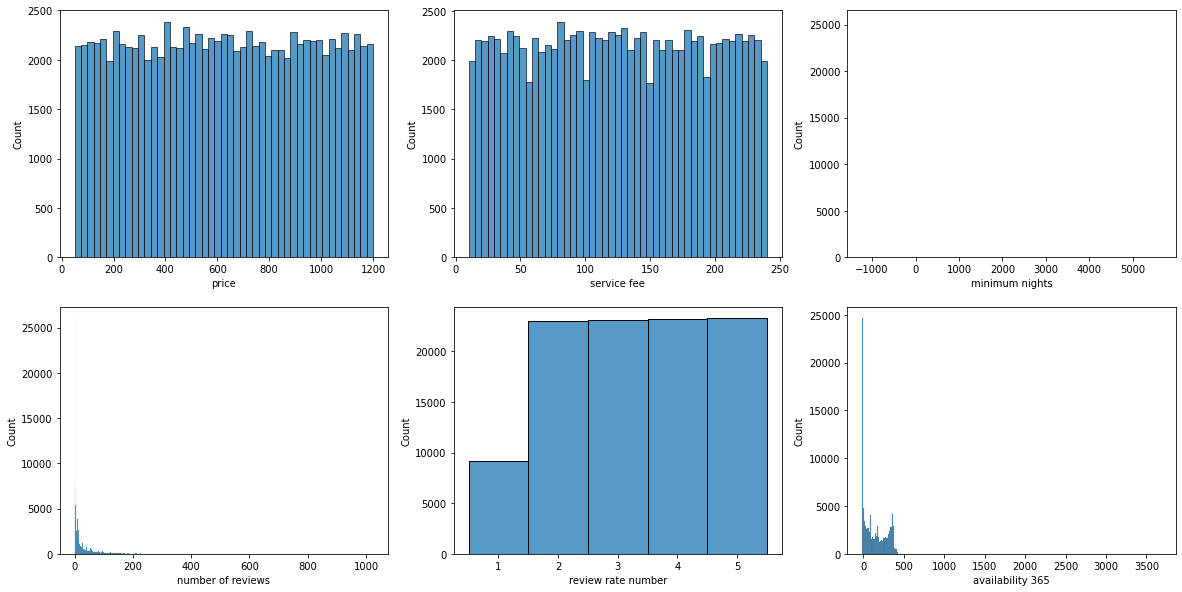

In [28]:
columns = ['price', 'service fee', 'minimum nights','number of reviews','review rate number', 'availability 365']
fig,ax = plt.subplots(2,3, figsize = (20,10));
ax =ax.flatten()
for i in range(len(columns)):
        sns.histplot(airbnb[columns[i]],ax = ax[i]);

>  # **1.Relational plots**

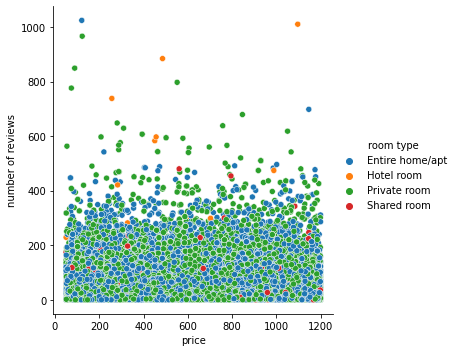

In [29]:
#scatter plots
sns.relplot(data=airbnb, kind='scatter', x='price', y='number of reviews', hue='room type');

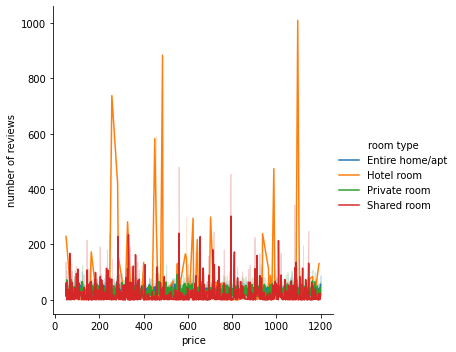

In [30]:
#line plot
sns.relplot(data=airbnb, kind='line', x='price',  y='number of reviews', hue='room type');

> #  **2. Distribution Plots**

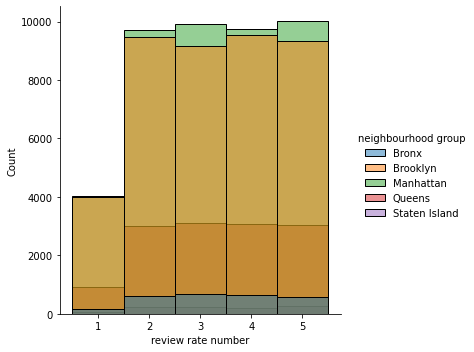

In [31]:
sns.displot(kind="hist",data=airbnb, x='review rate number', hue='neighbourhood group');

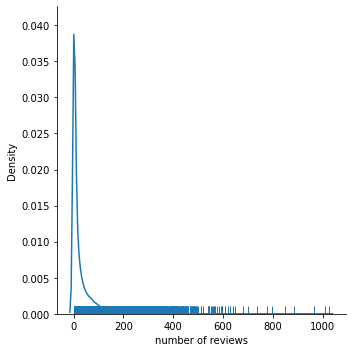

In [32]:
sns.displot(kind="kde",data=airbnb, x='number of reviews');
sns.rugplot(data=airbnb, x='number of reviews');

> # **3. Categorical Plots**

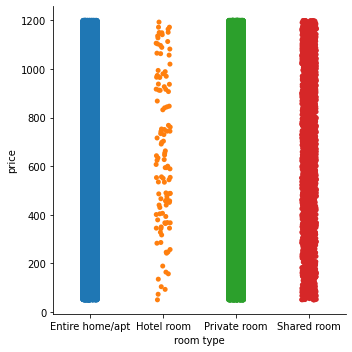

In [33]:
sns.catplot(kind="strip",data=airbnb, x='room type', y='price');

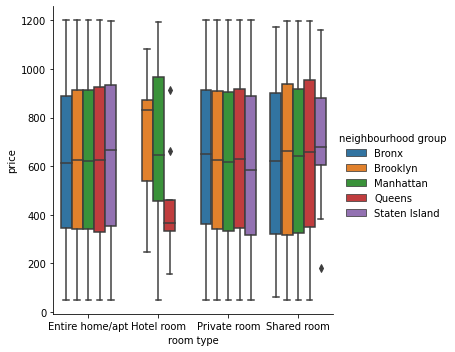

In [34]:
sns.catplot(kind="box",data=airbnb, x='room type', y='price', hue='neighbourhood group');

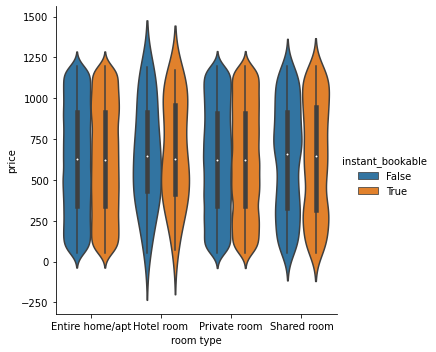

In [35]:
sns.catplot(kind="violin",data=airbnb, x='room type', y='price', hue='instant_bookable');

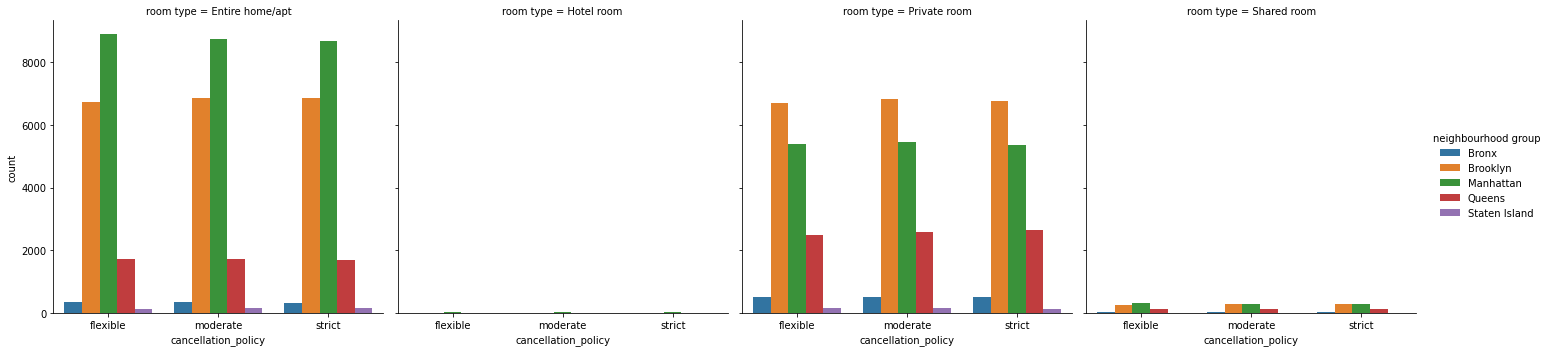

In [36]:
sns.catplot(data=airbnb, kind='count', x='cancellation_policy', col='room type', hue='neighbourhood group');

# 6. **Word Cloud**

In [37]:
#get the words to perform the the words cloud
text = " ".join(review for review in airbnb.NAME.astype(str))
print ("There are {} words in the combination of all cells in column NAME.".format(len(text)))

There are 3928447 words in the combination of all cells in column NAME.


In [38]:
#set the stop words by default which you will not include
stopwords = set(STOPWORDS)

In [39]:
#Add custom word exlusions
stopwords.update(["guidelines", "implemented", "access", "Average", "near","room", 'one', "Location", "Best",'Apt', 'stop', 'Full', 'NY','Gem', 'Chic'])

In [40]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

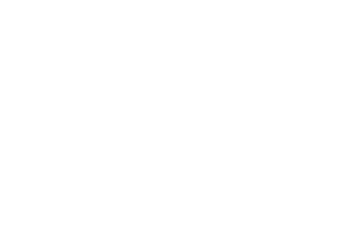

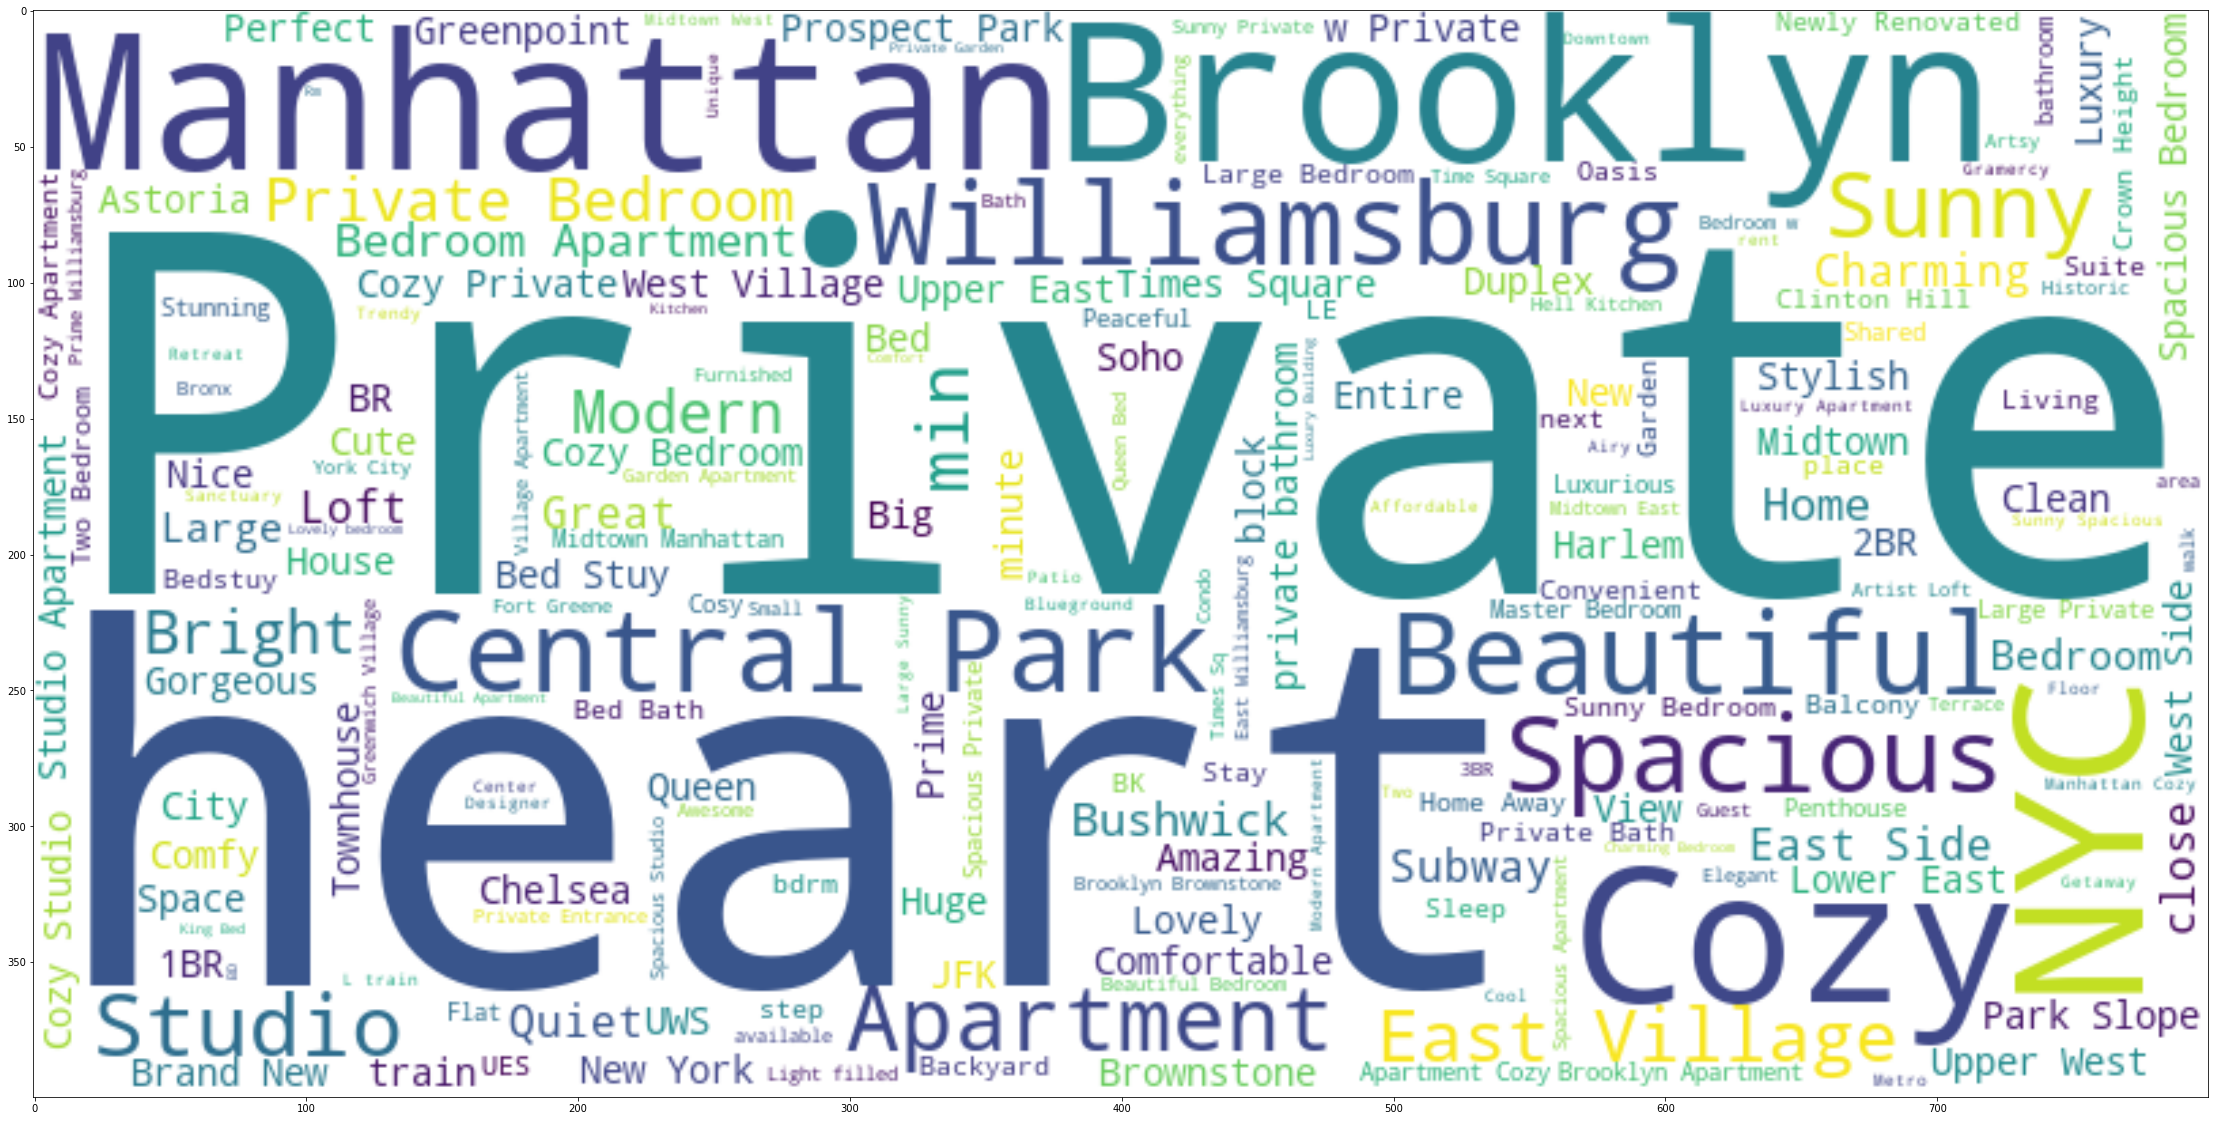

In [41]:
plt.axis("off");
plt.figure(figsize=(40,20));
plt.tight_layout(pad=0);
plt.imshow(wordcloud, interpolation='bilinear');
plt.show();